![title](images/hallows.png)

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import string
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fwagner/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 2. Read the text file

In [2]:
# Read the text file
with open("book_text/HPBook1.txt") as f:
    book1 = f.read()

In [3]:
# Convert to lower case and check first 100 characters 
book1 = book1.lower()
book1[1:200]

"he boy who lived  mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you'd expect to be involved in "

\n is often an indication of page breaks, new paragraphs, whitespace, etc., which has to be removed from the corpus

In [4]:
# Remove the punctuation marks from the corpus (string library)

print("All punctuation marks: ",string.punctuation)

# Loop to replace each punctuation mark with None in the corpus
punctuation_to_keep = ['.', '!', '?', ';'] #keep punctutation that signifies end of sentences for sentence tokenizing

punctuation_to_remove = ''.join([p for p in string.punctuation if p not in punctuation_to_keep])

book1_cln = book1.translate(str.maketrans('', '', punctuation_to_remove))

book1_cln[:200]

All punctuation marks:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'the boy who lived  mr. and mrs. dursley of number four privet drive were proud to say that they were perfectly normal thank you very much. they were the last people youd expect to be involved in anyth'

### 3. Sentence tokenization

In [5]:
# Tokenize the corpus into sentences in form of list
sentences = sent_tokenize(book1_cln)
print(sentences[:5])

print('\n')

# length of sentences
print("Total number of sentences in this book - ",len(sentences))

['the boy who lived  mr. and mrs. dursley of number four privet drive were proud to say that they were perfectly normal thank you very much.', 'they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense.', 'mr. dursley was the director of a firm called grunnings which made drills.', 'he was a big beefy man with hardly any neck although he did have a very large mustache.', 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.']


Total number of sentences in this book -  6344


always double check your data source for text patterns

### 4. Bag of Words

Using word tokenizer to create bag of words from the corpus.

In [6]:
corpus = ' '.join(sentences)

In [7]:
# length of words
words = word_tokenize(corpus)
print(words[:10])

stop_words = list(stopwords.words('english'))
my_stopwords = stop_words + ['.', '?', '!', ';', '...']
words = [w for w in words if w not in my_stopwords]

print('\n')
print("Total number of words in this book: ",len(words))
print(words[:10])


['the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley', 'of', 'number']


Total number of words in this book:  42518
['boy', 'lived', 'mr.', 'mrs.', 'dursley', 'number', 'four', 'privet', 'drive', 'proud']


In [8]:
# Finding the frequency of each unique words
count_dict = Counter(words)

print("Number of unique words in the book: ",len(count_dict.keys()))

Number of unique words in the book:  5918


In [9]:
# Converting to dataframe for analysis
bow_df = pd.DataFrame(count_dict.items()).rename(columns={0:'word',1:'count'})
bow_df.head()

,word,count
0,boy,83
1,lived,9
2,mr.,81
3,mrs.,46
4,dursley,54


In [10]:
#n-grams
bigrm = nltk.bigrams(words)
bigram_fd = nltk.FreqDist(bigrm)
bigram_fd.most_common(10)


[(('said', 'harry'), 142),
 (('said', 'ron'), 111),
 (('uncle', 'vernon'), 97),
 (('professor', 'mcgonagall'), 90),
 (('said', 'hagrid'), 90),
 (('aunt', 'petunia'), 52),
 (('harry', 'ron'), 49),
 (('said', 'hermione'), 42),
 (('ron', 'hermione'), 35),
 (('mr.', 'dursley'), 30)]

### 5. Exploratory Data Analysis

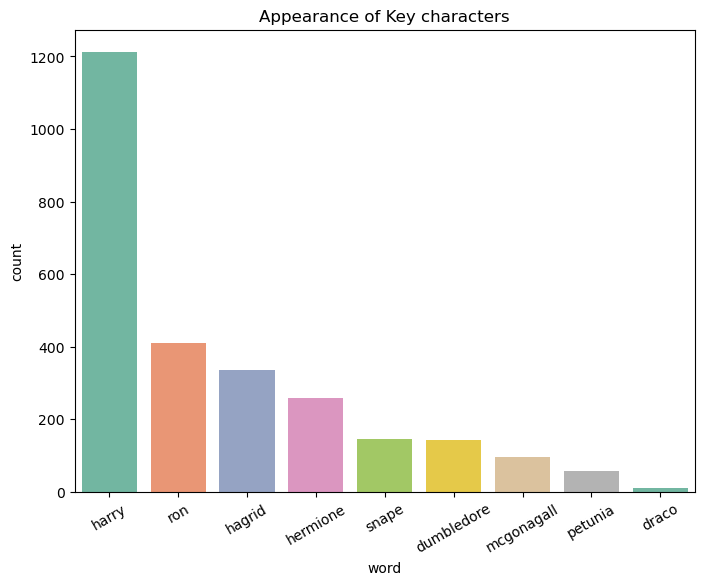

In [11]:
# Appearance of key characters in the book
key_char = ['petunia', 'harry','ron','hermione','dumbledore','snape','hagrid','mcgonagall', 'draco']

d = bow_df[bow_df['word'].isin(key_char)].sort_values(by='count',ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x = d['word'],y = d['count'], palette='Set2')
plt.title("Appearance of Key characters")

# Rotate x-labels by 30 degrees
plt.xticks(rotation=30)
plt.show()

#### WORDCLOUD

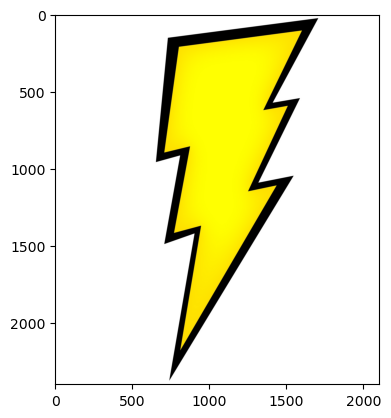

In [12]:
# Bring in mask data
photo = Image.open("images/lightning bolt.jpeg")
mask = np.array(photo)

plt.imshow(photo)

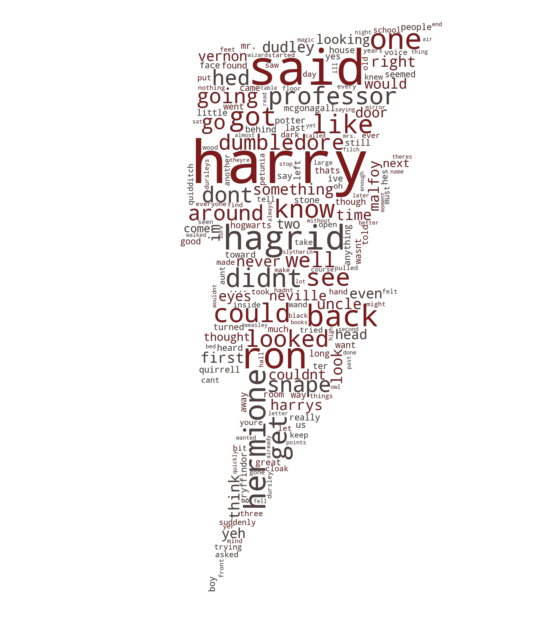

In [13]:
# Create Color Maps
colorsList = ['#503F3F', '#801919']
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=mask, min_font_size=12, max_words=200, 
                      random_state=1, colormap=ColorMap, background_color=None, mode='RGBA').generate_from_frequencies(count_dict)

# Display the generated image:
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
spells = ['alohomora', 'stupefy','avada', 'riddikulus', 'obliviate', 'sectumsempra', 'lumos', 'expelliarmus',
         'wingardium', 'leviosa', 'accio', 'expecto', 'patronum', 'imperio', 'aguamenti', 'confundo', 'engorgio',
         'revelio', 'muffliato', 'reparo', 'petrificus', 'totalus', 'protego', 'reducio', 'scourgify']
SpellDictionary = {x:count_dict[x] for x in spells}

Counts = Counter(SpellDictionary)

for word, count in Counts.most_common(10):
    print(word, ": ", count)

leviosa :  4
wingardium :  3
alohomora :  2
petrificus :  1
totalus :  1
stupefy :  0
avada :  0
riddikulus :  0
obliviate :  0
sectumsempra :  0


### 6. Sentiment Analysis

In [15]:
# Bring in VADER Library and Sentiment Intensity Analyser
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()


In [16]:
df = pd.DataFrame({'Sentences': sentences})
df.head()

,Sentences
0,the boy who lived mr. and mrs. dursley of num...
1,they were the last people youd expect to be in...
2,mr. dursley was the director of a firm called ...
3,he was a big beefy man with hardly any neck al...
4,mrs. dursley was thin and blonde and had nearl...


In [17]:
# Get intensity scores of each sentence
df['Score']=df['Sentences'].apply(lambda x: sid.polarity_scores(x))
df.head()

,Sentences,Score
0,the boy who lived mr. and mrs. dursley of num...,"{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp..."
1,they were the last people youd expect to be in...,"{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'comp..."
2,mr. dursley was the director of a firm called ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,he was a big beefy man with hardly any neck al...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,mrs. dursley was thin and blonde and had nearl...,"{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp..."


check Vader Sentiment to understand the scoring: https://pypi.org/project/vader-sentiment/ 

The compound score is computed by **summing the valence scores** of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

positive sentiment: compound score >= 0.05 
neutral sentiment: (compound score > -0.05) and (compound score < 0.05) 
negative sentiment: compound score <= -0.05



In [18]:
# Place scores in own columns
df['CompScore']=df.Score.apply(lambda x: x.get("compound"))
df['PosScore']=df.Score.apply(lambda x: x.get("pos"))
df['NegScore']=df.Score.apply(lambda x: x.get("neg"))
df['NeuScore']=df.Score.apply(lambda x: x.get("neu"))

In [19]:
# With scores extracted, the original score field can be removed
df = df.drop(["Score"], axis=1)

# Adding Sentiment Flags
df['PosFlag'] = df.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df['NegFlag'] = df.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df['NeuFlag'] = df.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

df.head()

,Sentences,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,the boy who lived mr. and mrs. dursley of num...,0.8779,0.335,0.000,0.665,1,0,0
1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,mr. dursley was the director of a firm called ...,0.0000,0.000,0.000,1.000,0,0,1
3,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,mrs. dursley was thin and blonde and had nearl...,0.4927,0.084,0.000,0.916,1,0,0


In [20]:
print('There are', df['PosFlag'].sum(), "positive sentences,", \
      df['NegFlag'].sum(), "negative sentences, and", \
      df['NeuFlag'].sum(), "neutral sentences")

There are 1565 positive sentences, 1453 negative sentences, and 3326 neutral sentences


 How does the sentiment change during each chapter of the book over time?

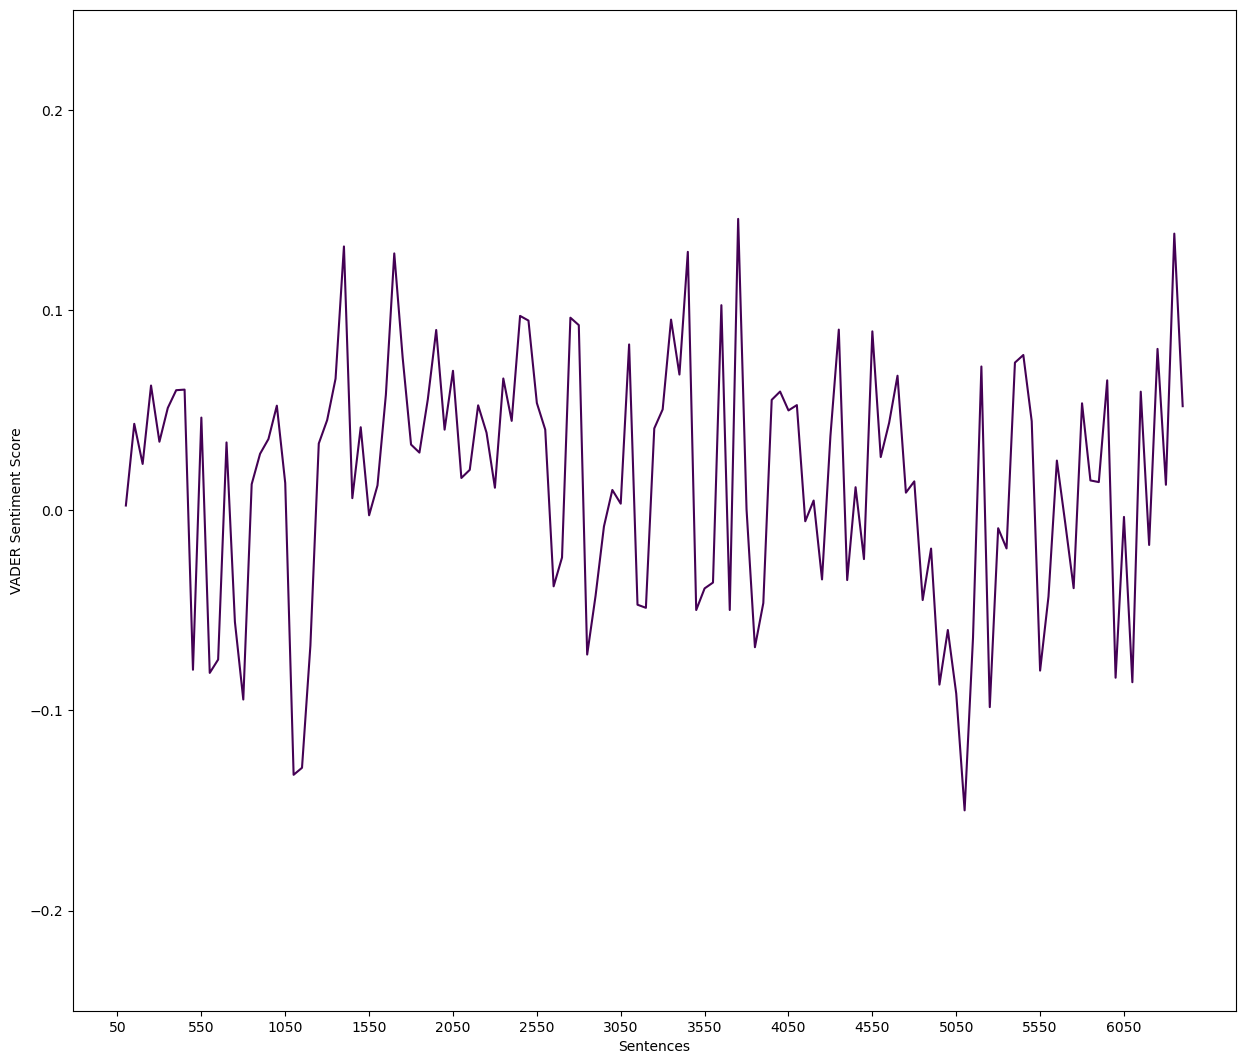

In [21]:
# Calculate the average CompScore for each group of 10 sentences
df['Group'] = (df.index // 50) + 1
averaged_scores = df.groupby('Group')['CompScore'].mean()

# Plot the averaged scores
fig, ax = plt.subplots(figsize=(15, 13))
averaged_scores.plot(ax=ax, ylim=(-0.25, 0.25), colormap='viridis') 
ax.set_facecolor('None')

ax.set_ylabel('VADER Sentiment Score')
ax.set_xlabel('Sentences')

xticks = averaged_scores.index * 50
ax.set_xticks(np.arange(len(averaged_scores))[::10])
ax.set_xticklabels(xticks[::10])

plt.show()

In [22]:
print("Total number of sentences in this book - ",len(sentences))

print('\n')
    
print(sentences[5050:5060])

print('\n')

print(sentences[6030:6040])


Total number of sentences in this book -  6344


['every now and then a ray of moonlight through the branches above lit a spot of silverblue blood on the fallen leaves.', 'harry saw that hagrid looked very worried.', 'could a werewolf be killing the unicorns?', 'harry asked.', 'not fast enough said hagrid.', 'its not easy ter catch a unicorn theyre powerful magic creatures.', 'i never knew one ter be hurt before.', 'they walked past a mossy tree stump.', 'harry could hear running water; there must be a stream somewhere close by.', 'there were still spots of unicorn blood here and there along the winding path.']


['quirrell raised his hand to perform a deadly curse but harry by instinct reached up and grabbed quirrells face   aaaargh!', 'quirrell rolled off him his face blistering too and then harry knew quirrell couldnt touch his bare skin not without suffering terrible pain  his only chance was to keep hold of quirrell keep him in enough pain to stop him from doing a curse.', 'harry 